<a href="https://colab.research.google.com/github/nikitaagarwal1992/Data-science/blob/main/Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Country-data.csv')

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
###
# Description
# country	The name of the country.
# child_mort	Number of deaths of children under 5 years of age per 1000 live births.
# exports	Exports of goods and services per capita, given as a percentage of GDP per capita.
# health	Health expenditure per capita, given as a percentage of GDP per capita.
# imports	Imports of goods and services per capita, given as a percentage of GDP per capita.
# income	Net income per person.
# inflation	Annual growth rate of the total GDP.
# life_expec	The average number of years a newborn child would live if current mortality patterns remain the same.
# total_fer	The number of children that would be born to each woman if current age-fertility rates remain the same.
# gdpp	The GDP per capita, calculated as the total GDP divided by the total population.
###

In [ ]:
data = df.drop('country',axis=1)

In [ ]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.isnull().sum()

,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


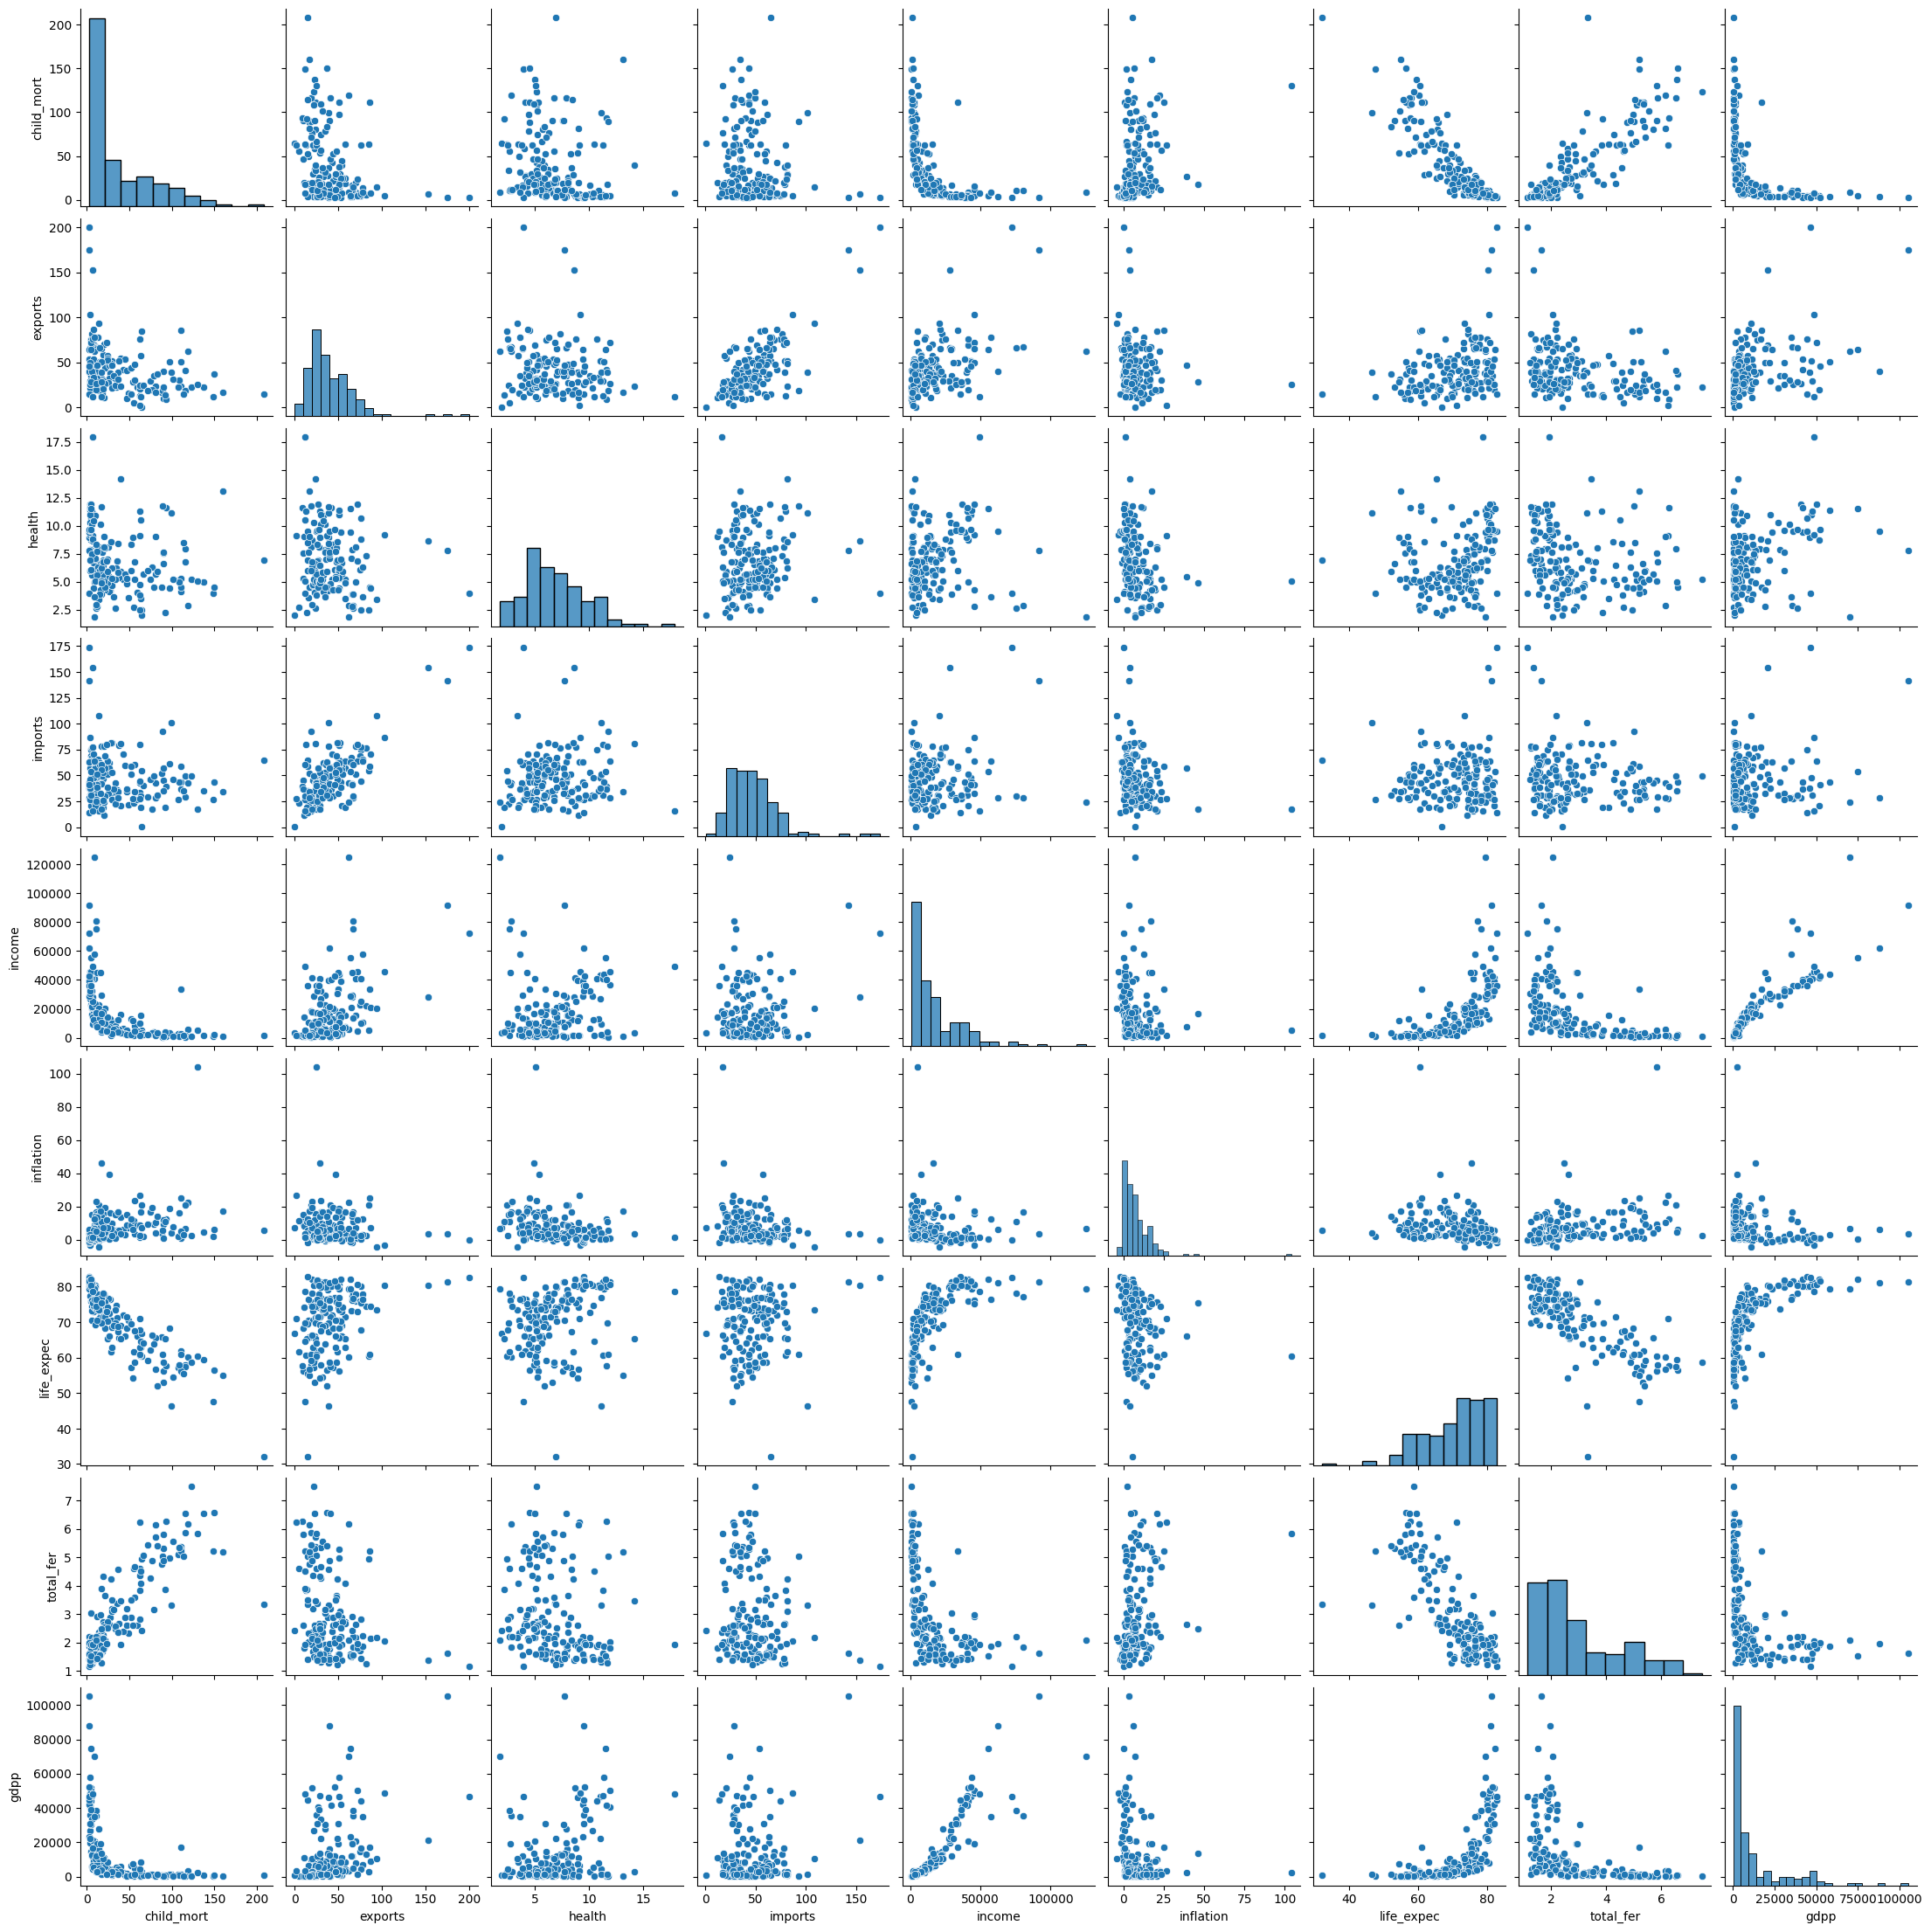

In [ ]:
sns.pairplot(data);

In [ ]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [ ]:
# High corelation: child mortality, total fertility
# import, export, income, GDP
# Mod : health and GDP

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_pca = pca.fit(data_scaled)

In [ ]:
data_pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457]])

In [ ]:
sum(data_pca.explained_variance_ratio_)

0.871907861402391

In [ ]:
data_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
data_pca_df = pd.DataFrame(pca.transform(data_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4']) # Pass the original scaled data to transform

In [ ]:
data_pca_df

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


In [ ]:
# PC1 : <-- Child Mortality/Fertility vs -->Economy
# PC2 : Higher on Import Export
# PC3 : <-- Overall Health  -->mod income, high inflation
# PC4 : <-- Life expectancy --> health/GDP

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca_df)

KMeans(n_clusters=2)

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_pca_df)
  inertia.append(kmeans.inertia_)

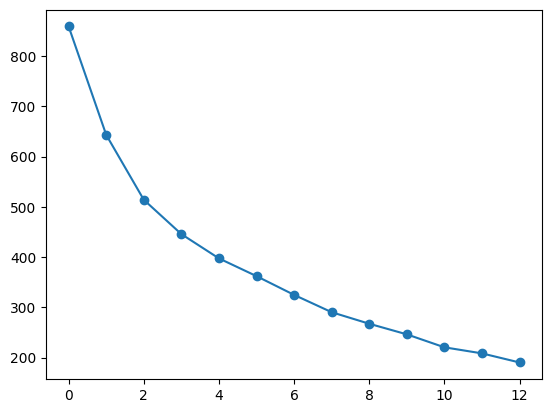

In [ ]:
inertia_series = pd.Series(inertia)

inertia_series.plot.line(marker = 'o');

In [ ]:
# n = 2, 3

In [ ]:
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans2.fit(data_pca_df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans2.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
data_pca_df

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


In [ ]:
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
pca_v2 = PCA(n_components=2)
pca_v2.fit(data_pca_df)

PCA(n_components=2)

<Axes: xlabel='PC1', ylabel='PC2'>

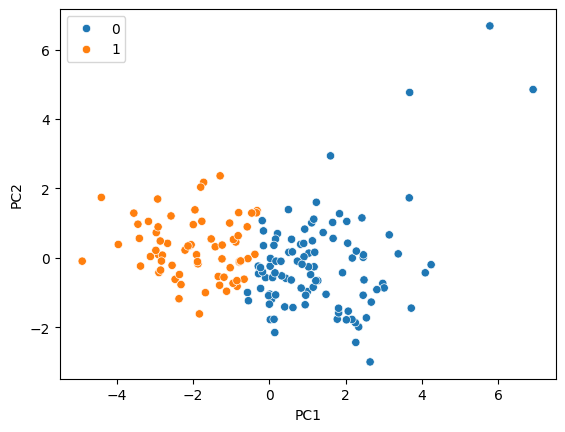

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2',
                data = pd.DataFrame(pca_v2.transform(data_pca_df),
                columns = ['PC1', 'PC2']), # Removed comma between PC1, PC2
                hue = kmeans2.labels_)

In [ ]:
pca = PCA(n_components=2)
pca.fit(data_scaled)

PCA(n_components=2)

In [ ]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

PC1: x-axis: <-- high child mortality/total fertility  --> higher income/gdp/life expectancy
PC2: y:axis: <-- health/life expectancy  --> import export

In [ ]:
data_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
kmeans2_scaled = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans2_scaled.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

<Axes: xlabel='PC1', ylabel='PC2'>

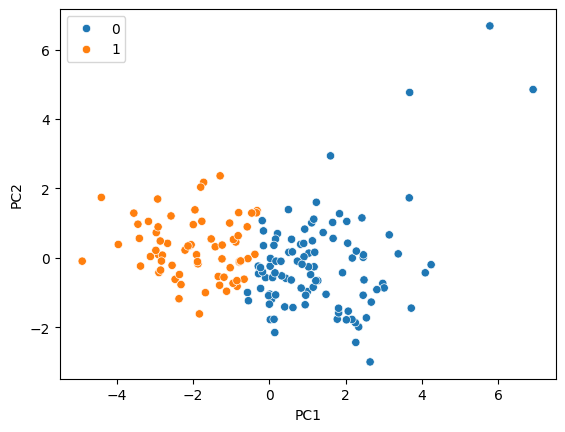

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2',
                data = pd.DataFrame(pca.transform(data_scaled),
                columns = ['PC1', 'PC2']), # Removed comma between PC1, PC2
                hue = kmeans2_scaled.labels_)

In [ ]:
df_pca = pd.DataFrame(pca.transform(data_scaled), columns = ['PC1', 'PC2'])

In [ ]:
df_pca

,PC1,PC2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


In [ ]:
kmeans2.cluster_centers_

array([[ 1.33493821, -0.19874057,  0.03691028, -0.18315306],
       [-1.94351298,  0.28934288, -0.05373702,  0.26664931]])

In [ ]:
kmeans2_scaled.cluster_centers_

array([[-0.64933447,  0.27420801,  0.18197312,  0.0924306 ,  0.46162133,
        -0.21617661,  0.66973969, -0.66709564,  0.41282308],
       [ 0.9453546 , -0.39921461, -0.26493145, -0.13456809, -0.67206635,
         0.31472771, -0.9750622 ,  0.97121277, -0.60102184]])

In [ ]:
data_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
kmeans2_scaled.cluster_centers_

array([[-0.64933447,  0.27420801,  0.18197312,  0.0924306 ,  0.46162133,
        -0.21617661,  0.66973969, -0.66709564,  0.41282308],
       [ 0.9453546 , -0.39921461, -0.26493145, -0.13456809, -0.67206635,
         0.31472771, -0.9750622 ,  0.97121277, -0.60102184]])

In [ ]:
centroid = pd.DataFrame(kmeans2_scaled.cluster_centers_, columns=data_scaled.columns)

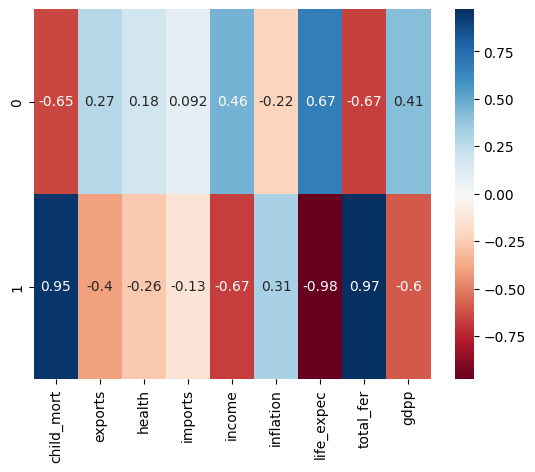

In [ ]:
sns.heatmap(centroid, annot=True, cmap = 'RdBu');

In [ ]:
# Cluster 1: developed
#Cluster 2:  underdeveloped

In [ ]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans4.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

Text(0.5, 1.0, 'Kmeans 4 clusters on PC transformed data')

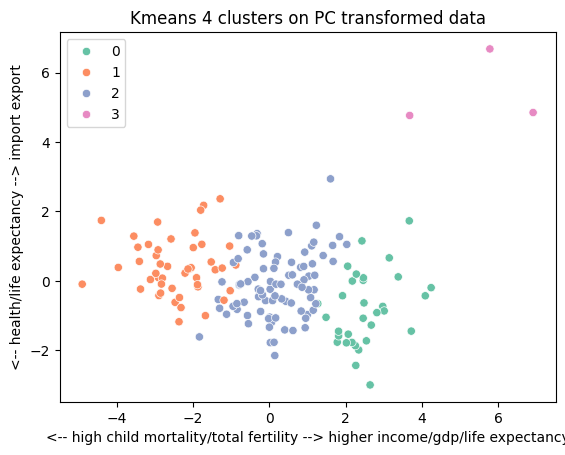

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2',
                data = pd.DataFrame(pca.transform(data_scaled),
                columns = ['PC1', 'PC2']), # Removed comma between PC1, PC2
                hue = kmeans4.labels_, palette = 'Set2',
                )
plt.xlabel('<-- high child mortality/total fertility --> higher income/gdp/life expectancy')
plt.ylabel('<-- health/life expectancy --> import export')

plt.title('Kmeans 4 clusters on PC transformed data')

In [ ]:
kmeans4.cluster_centers_

array([[-8.22940855e-01,  1.83308008e-01,  8.29894098e-01,
        -2.61252058e-01,  1.39837771e+00, -4.99856230e-01,
         1.07433094e+00, -7.68250332e-01,  1.59543611e+00],
       [ 1.36021776e+00, -4.37533128e-01, -1.55984012e-01,
        -1.89203770e-01, -6.86894080e-01,  4.02110776e-01,
        -1.28217981e+00,  1.36494385e+00, -6.04242430e-01],
       [-4.12342560e-01, -1.28020671e-03, -2.25892629e-01,
         4.24525884e-02, -2.32737556e-01, -1.63669262e-02,
         2.61216331e-01, -4.28844264e-01, -3.52670040e-01],
       [-8.49003244e-01,  4.93567278e+00, -8.16303241e-03,
         4.54805768e+00,  2.43954240e+00, -5.04206141e-01,
         1.22682431e+00, -1.03886271e+00,  2.44079735e+00]])

In [ ]:
centroid4 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_scaled.columns)

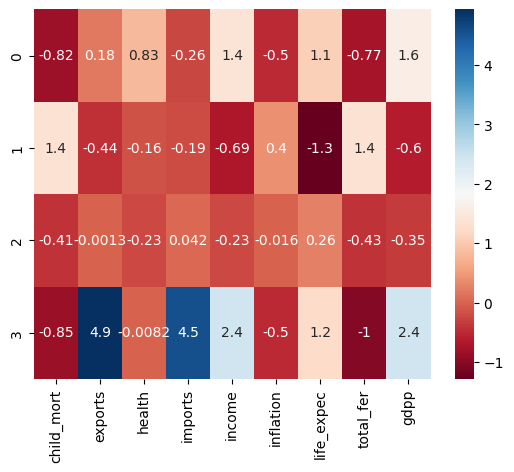

In [ ]:
sns.heatmap(centroid4, annot=True, cmap = 'RdBu');

In [ ]:

#Cluster 0: Avg Health & economy
# Cluster 1:underdeveloped
# Cluster 2:below average
#Cluster 3: developed

In [ ]:
# TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state= 42)
tsne_transform = tsne.fit_transform(data_scaled)

In [ ]:
tsne_transform

array([[-8.33338928e+00, -8.73606622e-01],
       [ 4.10676003e+00,  1.42165840e-01],
       [ 9.95537579e-01,  4.32920742e+00],
       [-8.59523964e+00,  3.57461143e+00],
       [ 5.89044285e+00, -2.03733897e+00],
       [ 3.92222500e+00,  5.02325344e+00],
       [ 2.22973442e+00,  1.24520099e+00],
       [ 1.42738295e+01, -9.36133206e-01],
       [ 1.29606590e+01, -3.19040847e+00],
       [ 1.58462238e+00,  5.04341030e+00],
       [ 8.93669987e+00, -5.73501408e-01],
       [ 9.74540234e+00,  3.23615837e+00],
       [-1.27467608e+00,  3.81421709e+00],
       [ 7.06464338e+00, -8.71894002e-01],
       [ 3.63864756e+00, -3.27678204e+00],
       [ 1.18793640e+01, -4.46128178e+00],
       [ 1.99888253e+00, -2.29552412e+00],
       [-7.95876408e+00,  2.56502330e-02],
       [ 1.05881584e+00, -2.39962554e+00],
       [-1.41628176e-01,  2.36166358e+00],
       [ 6.94986343e+00,  9.60406840e-01],
       [-3.26073146e+00, -2.41384912e+00],
       [ 5.06282759e+00,  4.06538486e+00],
       [ 1.

In [ ]:
df_tsne = pd.DataFrame(tsne_transform, columns = ['TSNE1', 'TSNE2'])

In [ ]:
df_pca = pd.DataFrame(pca.transform(data_scaled), columns = ['PC1', 'PC2'])

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

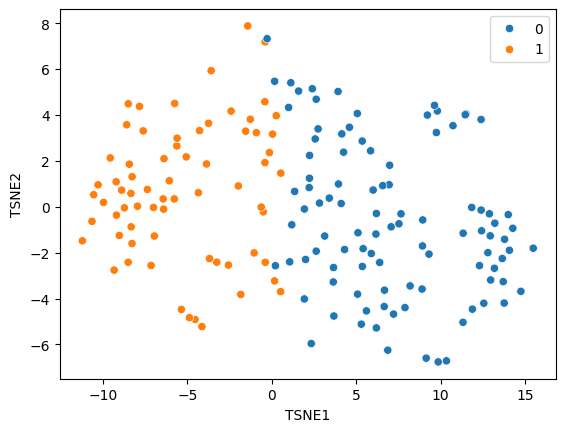

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = kmeans2.labels_)

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

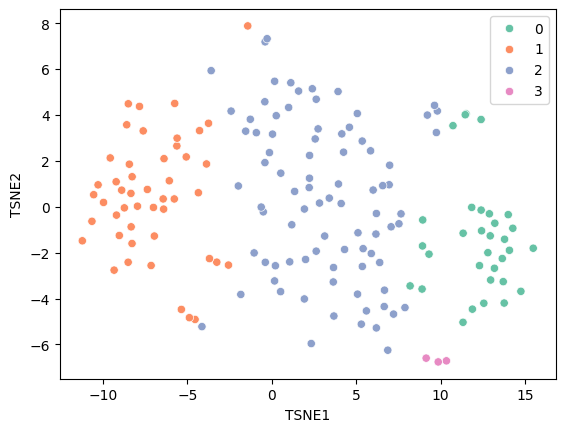

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = kmeans4.labels_, palette = 'Set2')

In [ ]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_tsne['TSNE1'],
    y=df_tsne['TSNE2'],
    mode='markers',
    marker=dict(
        size=10,
        color=kmeans4.labels_,  # Color by cluster label
        colorscale='Viridis',  # Choose a colorscale
        showscale=True
    ),
    text=df['country'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(df['country']):
    fig.add_annotation(
        x=df_tsne['TSNE1'].iloc[i],
        y=df_tsne['TSNE2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Countries Development Status',

    height=650,
    width=800,
)

# Show the int
fig.show()

In [ ]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    mode='markers',
    marker=dict(
        size=10,
        color=kmeans4.labels_,  # Color by cluster label
        colorscale='Viridis',  # Choose a colorscale
        showscale=True
    ),
    text=df['country'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(df['country']):
    fig.add_annotation(
        x=df_pca['PC1'].iloc[i],
        y=df_pca['PC2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Countries',
    xaxis=dict(title='<-- child mort/fertilit        --> income/gdp'),
    yaxis=dict(title='<--health/life expec    import/export-->'),
    height=800,
    width=1200,
)

# Show the int
fig.show()

In [ ]:
df[df['country'].isin(['United States', 'Seychelles', 'Singapore', 'Japan'])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
#Cluster 3: developed
#Cluster 0: Good Health avg economy
# Cluster 1:underdeveloped
# Cluster 2:below average


cluster 1 : developed countries
cluster 2: Under developed countries

In [ ]:

from sklearn.cluster import DBSCAN

In [ ]:
# put the entire process into a function
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [ ]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5)
dbscan.fit(df_tsne)
dbscan.labels_

array([ 0,  1,  1, -1,  1,  1,  1,  2,  2,  1,  1,  3,  1,  1,  1,  2,  4,
        0,  4,  1,  1, -1,  1,  3,  1,  0,  0,  4,  0,  2,  1,  0,  0,  1,
        1,  1,  0,  0, -1,  1,  0,  1, -1,  1,  2,  1,  1,  1,  1, -1,  0,
        1,  4,  2,  2, -1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  4,  0,  1,
        2,  1,  1,  1,  0,  2,  2,  2,  1,  2,  4,  1,  0, -1,  3,  4,  0,
        1,  1, -1, -1,  3,  1, -1,  1,  0,  0,  1,  1,  0, -1, -1,  1, -1,
       -1, -1,  1,  1,  0,  1, -1,  1,  2,  2,  0, -1,  2,  3, -1,  1,  1,
        1,  1,  1,  2, -1,  1,  1,  0, -1,  3,  0,  1,  1,  0, -1,  1,  1,
       -1, -1, -1,  2,  1,  1,  0,  1,  2,  2, -1,  0,  1,  0,  0, -1,  1,
        1, -1,  0,  1,  3,  2,  2,  1,  1,  4, -1, -1,  0,  0])

In [ ]:
dbscan = DBSCAN(eps = 1.4, min_samples = 6)
dbscan.fit(data_scaled)
dbscan.labels_

array([ 0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        0,  1,  1,  1, -1,  1, -1,  1,  0,  0,  1,  0,  1,  1, -1,  0,  1,
        1,  1,  0, -1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1,  0,
        1,  1,  1,  1, -1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  0, -1, -1,  1,  0,
        1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1,  0, -1, -1,  1, -1,
        1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  0, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  0,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1, -1,  0,  1,  1,
        1, -1,  0,  1, -1,  1, -1,  1,  1,  1, -1,  1,  0,  0])

In [ ]:
dbscan = DBSCAN(eps = 0.5, min_samples = 4)
dbscan.fit(df_pca)
dbscan.labels_

array([ 0,  1,  1, -1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, -1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  2,  1, -1,  0,  1,
        1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1,  0,
        1,  1,  2,  2,  1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1, -1,  1,
        2,  1,  1,  1,  1, -1,  1,  2,  1,  2,  1,  1,  0,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  0, -1, -1,  1,  1,
        1,  1,  1,  1,  0, -1,  1,  1, -1,  2,  0, -1, -1,  1,  0,  1,  1,
        1,  1,  1,  2, -1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,
        1,  1,  1,  2,  1,  1,  0,  1,  2, -1,  1,  0,  1,  0, -1,  1,  1,
        1,  1,  0,  1,  1,  2, -1,  1,  1,  1,  1, -1,  0,  0])

In [ ]:
data_scaled_db = tune_dbscan(data_scaled)

In [ ]:
(data_scaled_db.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
108,1.4,6,2,41,0.215397
99,1.3,5,2,46,0.202324
100,1.3,6,2,48,0.196773
109,1.4,7,2,44,0.193415
110,1.4,8,2,47,0.175862


In [ ]:
pca_db = tune_dbscan(df_pca)

In [ ]:
(pca_db.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
34,0.5,4,3,23,0.246452
56,0.8,2,3,8,0.229223
48,0.7,2,3,9,0.224633
46,0.6,8,3,41,0.212030
47,0.6,9,3,44,0.201655


In [ ]:
# silhouette score of the model
from sklearn.metrics import silhouette_score

In [ ]:
# loop through many values of epsilon and min_samples
import numpy as np

results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1, 2, .1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_tsne)
        labels = dbscan.labels_

        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)

        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(tsne_transform, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None

        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,1,165,NaN
1,0.1,3,0,167,NaN
2,0.1,4,0,167,NaN
3,0.1,5,0,167,NaN
4,0.1,6,0,167,NaN


In [ ]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
147,1.9,5,4,10,0.357917
148,1.9,6,4,14,0.351936
139,1.8,5,4,13,0.346323
140,1.8,6,4,18,0.343195
149,1.9,7,4,17,0.335905
...,...,...,...,...,...
78,1.0,8,0,167,NaN
79,1.0,9,0,167,NaN
86,1.1,8,1,159,NaN
87,1.1,9,0,167,NaN


In [ ]:
# view only the top result for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
147,1.9,5,4,10,0.357917
148,1.9,6,4,14,0.351936
139,1.8,5,4,13,0.346323
140,1.8,6,4,18,0.343195
149,1.9,7,4,17,0.335905


In [ ]:
dbscan_v2 = DBSCAN(eps = 1.9, min_samples = 5)
dbscan_v2.fit(df_tsne)

dbscan_v2.labels_

array([ 0,  1,  1,  0,  1,  1,  1,  2,  2,  1,  1,  3,  1,  1,  1,  2,  1,
        0,  1,  1,  1,  1,  1,  3,  1,  0,  0,  1,  0,  2,  1,  0,  0,  1,
        1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1,  0,  0,
        1,  1,  2,  2,  0,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1,  0,  1,
        2,  1,  1,  1,  0,  2,  2,  2,  1,  2,  1,  1,  0, -1,  3,  1,  0,
        1,  1, -1, -1,  3,  1, -1,  1,  0,  0,  1,  1,  0, -1,  0,  1, -1,
        1,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0, -1,  2,  3,  0,  1,  1,
        1,  1,  1,  2,  3,  1,  1,  0,  1,  3,  0,  1,  1,  0, -1,  1,  1,
        1,  1,  1,  2,  1,  1,  0,  1,  2,  2,  1,  0,  1,  0,  0,  1,  1,
        1, -1,  0,  1,  3,  2,  2,  1,  1,  1, -1,  1,  0,  0])

In [ ]:
# view the value counts
from collections import Counter
Counter(dbscan_v2.labels_)

Counter({0: 40, 1: 86, 2: 23, 3: 8, -1: 10})

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

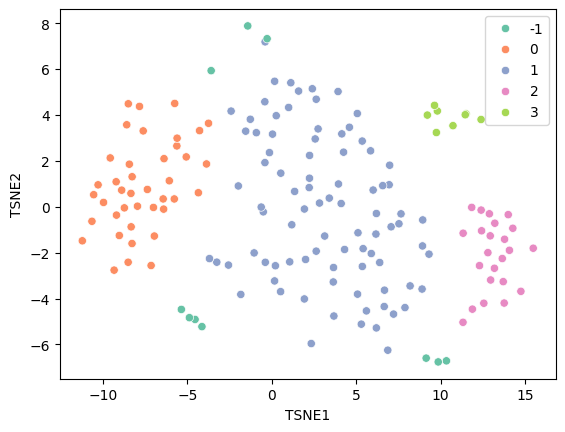

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = dbscan_v2.labels_, palette = 'Set2')

In [ ]:

#Cluster 0: Good Health avg economy
# Cluster 1:underdeveloped
# Cluster 2:below average
#Cluster 3: developed

In [ ]:
clusters = kmeans4.labels_

In [ ]:
df['cluster'] = clusters

In [ ]:
# Create a mapping dictionary
cluster_mapping = {
    3: 'developed',
    0: 'Good Health avg economy',
    1: 'underdeveloped',
    2: 'below average'
}

# Map the cluster numbers to the descriptive names
df['Cluster_Description'] = df['cluster'].map(cluster_mapping)

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Description
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,underdeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,below average
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,below average
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,underdeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,below average


In [ ]:
df.value_counts('Cluster_Description')

,count
Cluster_Description,
below average,85
underdeveloped,47
Good Health avg economy,32
developed,3


In [ ]:
df[df['country']=='India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Description
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,2,below average


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.353293
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.807180
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,1.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,2.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,2.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,3.000000


In [ ]:
import plotly.express as px # imports the plotly.express module and aliases it as px

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame and it has columns for 'country', 'cluster', and 'Cluster_Description'
fig = px.choropleth(
    df,
    locations='country',  # Specify the column with country names
    locationmode='country names',  # Use country names for mapping
    color="Cluster_Description",  # Use descriptive cluster names for coloring
    hover_name="country",  # Display country name on hover
    hover_data=["Cluster_Description"],  # Show descriptive cluster name on hover
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Use a discrete color scale
    title='K-means Clustering Results'
)

# Update the layout for better aesthetics and size
fig.update_layout(
    title={
        'text': 'K-means Clustering Results',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24
        }
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    height=600,  # Set the height of the plot
    width=1100   # Set the width of the plot
)

# Show the figure
fig.show()

In [ ]:
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


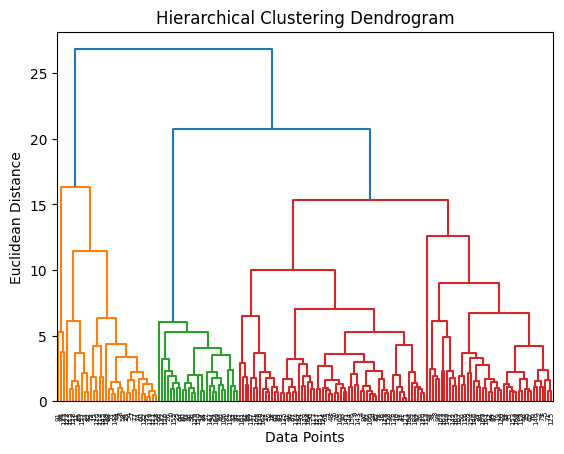

In [ ]:
# Hierarchial Clustering

# visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# hierarchical clustering with sklearn, with 3 clusters
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(3)
agg.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

In [ ]:
# view the 3 cluster labels
agg.labels_

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
# view the value counts
from collections import Counter

Counter(agg.labels_)

Counter({2: 27, 1: 106, 0: 34})

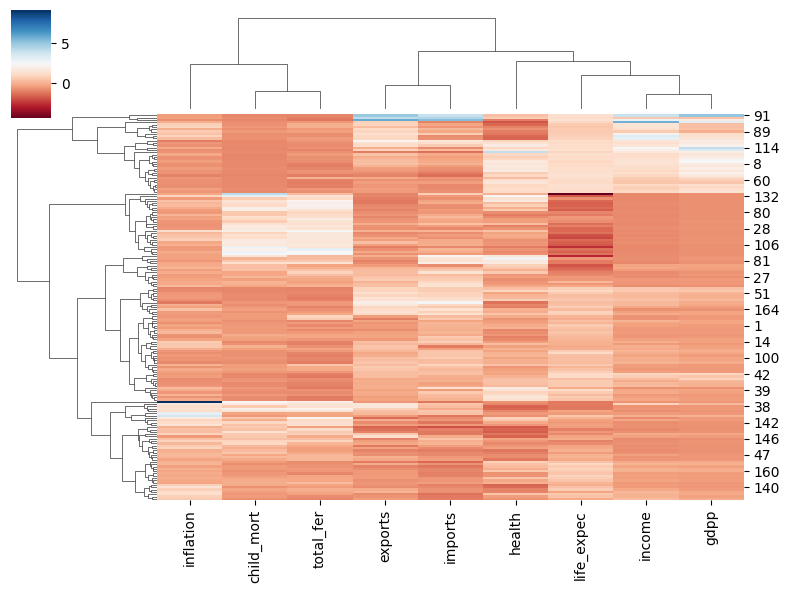

In [ ]:
# create a cluster map
clustermap = sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

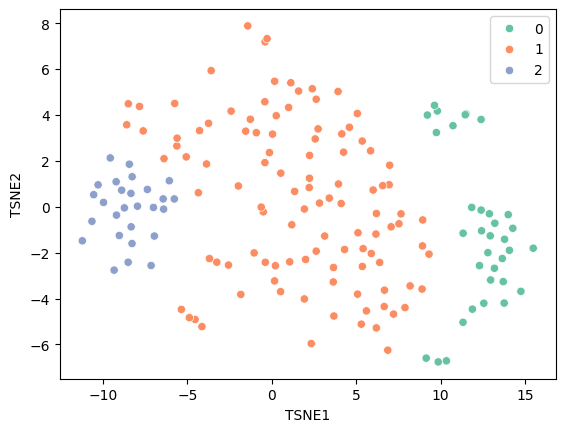

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = agg.labels_, palette = 'Set2')

In [ ]:
# best kmeans model: 4 clusters on engineered data
kmeans_final = pd.Series(kmeans4.labels_, name='kmeans')
kmeans_final_clusters = kmeans_final.map({3: 'developed',
                                          0: 'Good Health avg economy',
                                          1: 'underdeveloped',
                                          2: 'below average'
})
kmeans_final_clusters.head()

,kmeans
0,underdeveloped
1,below average
2,below average
3,underdeveloped
4,below average


In [ ]:
# best hierarchical model: 3 clusters on engineered data
hier_final = pd.Series(agg.labels_, name='hierarchical')
hier_final.head()

,hierarchical
0,2
1,1
2,1
3,1
4,1


In [ ]:
# best dbscan model: 3 clusters on engineered data
dbscan_final = pd.Series(dbscan_v2.labels_, name='dbscan')
dbscan_final.head()

,dbscan
0,0
1,1
2,1
3,0
4,1


Compare Number of Clusters in each model

In [ ]:
kmeans_final.value_counts().sort_values()

,count
kmeans,
3,3
0,32
1,47
2,85


In [ ]:
hier_final.value_counts().sort_values()

,count
hierarchical,
2,27
0,34
1,106


In [ ]:
dbscan_final.value_counts().sort_values()

,count
dbscan,
3,8
-1,10
2,23
0,40
1,86


Compare Silhoutte Score

In [ ]:
silhouette_score(data_scaled, kmeans4.labels_)

0.29595170577528157

In [ ]:
silhouette_score(df_pca, kmeans4.labels_)

0.38302554714647435

In [ ]:
silhouette_score(data_scaled, agg.labels_)

0.24563001303300652

In [ ]:
silhouette_score(data_scaled, dbscan_v2.labels_)

0.29063554344350273

In [ ]:
silhouette_score(df_tsne, dbscan_v2.labels_)

0.3579172

In [ ]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_tsne['TSNE1'],
    y=df_tsne['TSNE2'],
    mode='markers',
    marker=dict(
        size=10,
        color=dbscan_v2.labels_,  # Color by cluster label
        colorscale='Viridis',  # Choose a colorscale
        showscale=True
    ),
    text=df['country'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(df['country']):
    fig.add_annotation(
        x=df_tsne['TSNE1'].iloc[i],
        y=df_tsne['TSNE2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Countries Development Status',
    xaxis=dict(title='<-- child mort/fertilit        --> income/gdp'),
    yaxis=dict(title='<--health/life expec    import/export-->'),
    height=650,
    width=800,
)

# Show the int
fig.show()

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

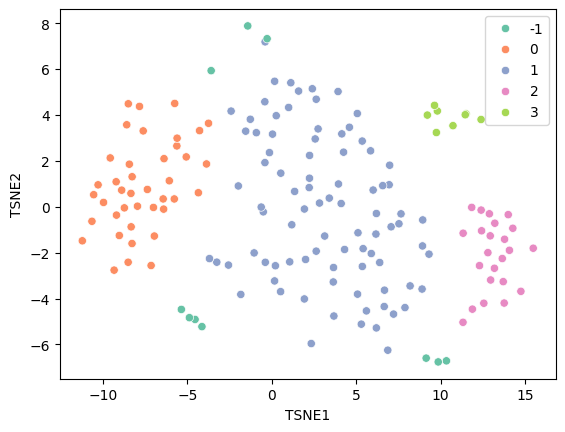

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = dbscan_v2.labels_, palette = 'Set2')

In [ ]:
df[df['country'].isin(['Bahrain', 'Saudi Arabia', 'Libya', 'Oman'])]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Description
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,2,below average
89,Libya,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100,2,below average
115,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19300,2,below average
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.20,75.1,2.96,19300,2,below average


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,1.353293
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.807180
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,1.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,2.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,2.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,3.000000


Text(0.5, 1.0, 'Kmeans 4 clusters on PC transformed data')

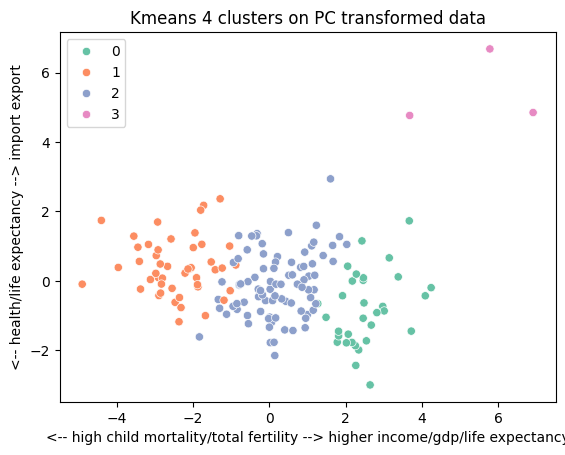

In [ ]:
# Final Model based on metrics:

sns.scatterplot(x = 'PC1', y = 'PC2',
                data = pd.DataFrame(pca.transform(data_scaled),
                columns = ['PC1', 'PC2']), # Removed comma between PC1, PC2
                hue = kmeans4.labels_, palette = 'Set2',
                )
plt.xlabel('<-- high child mortality/total fertility --> higher income/gdp/life expectancy')
plt.ylabel('<-- health/life expectancy --> import export')

plt.title('Kmeans 4 clusters on PC transformed data')

In [ ]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    mode='markers',
    marker=dict(
        size=10,
        color=kmeans4.labels_,  # Color by cluster label
        colorscale='Viridis',  # Choose a colorscale
        showscale=True
    ),
    text=df['country'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(df['country']):
    fig.add_annotation(
        x=df_pca['PC1'].iloc[i],
        y=df_pca['PC2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Countries',
    xaxis=dict(title='<-- child mort/fertilit        --> income/gdp'),
    yaxis=dict(title='<--health/life expec    import/export-->'),
    height=800,
    width=1200,
)

# Show the int
fig.show()

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame and it has columns for 'country', 'cluster', and 'Cluster_Description'
fig = px.choropleth(
    df,
    locations='country',  # Specify the column with country names
    locationmode='country names',  # Use country names for mapping
    color="Cluster_Description",  # Use descriptive cluster names for coloring
    hover_name="country",  # Display country name on hover
    hover_data=["Cluster_Description"],  # Show descriptive cluster name on hover
    color_discrete_sequence=px.colors.qualitative.Plotly,  # Use a discrete color scale
    title='K-means 4 Clustering on PCA transformed data Results'
)

# Update the layout for better aesthetics and size
fig.update_layout(
    title={
        'text': 'K-means Clustering Results',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 24
        }
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    height=600,  # Set the height of the plot
    width=1100   # Set the width of the plot
)

# Show the figure
fig.show()